<a href="https://colab.research.google.com/github/jayanthk17/Internship-Final-Year/blob/main/Diabetes_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
df = pd.read_csv('diabetes_data_upload.csv')

## Data Exploration

In [44]:
df.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              520 non-null    object
 1   Polyuria            520 non-null    object
 2   Polydipsia          520 non-null    object
 3   sudden weight loss  520 non-null    object
 4   weakness            520 non-null    object
 5   Polyphagia          520 non-null    object
 6   Genital thrush      520 non-null    object
 7   visual blurring     520 non-null    object
 8   Itching             520 non-null    object
 9   Irritability        520 non-null    object
 10  delayed healing     520 non-null    object
 11  partial paresis     520 non-null    object
 12  muscle stiffness    520 non-null    object
 13  Alopecia            520 non-null    object
 14  Obesity             520 non-null    object
 15  class               520 non-null    object
dtypes: object(16)
memory usage

In [46]:
df['Gender'] = df['Gender'].apply(str)

In [47]:
df['class'].value_counts(), df['Gender'].value_counts()

(Positive    320
 Negative    200
 Name: class, dtype: int64,
 Male      328
 Female    192
 Name: Gender, dtype: int64)

In [48]:
 df.columns

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [49]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Polyuria'] = df['Polyuria'].map({'Yes': 1, 'No': 0})
df['Polydipsia'] = df['Polydipsia'].map({'Yes': 1, 'No': 0})
df['sudden weight loss'] = df['sudden weight loss'].map({'Yes': 1, 'No': 0})
df['weakness'] = df['weakness'].map({'Yes': 1, 'No': 0})
df['Polyphagia'] = df['Polyphagia'].map({'Yes': 1, 'No': 0})
df['Genital thrush'] = df['Genital thrush'].map({'Yes': 1, 'No': 0})
df['visual blurring'] = df['visual blurring'].map({'Yes': 1, 'No': 0})
df['Itching'] = df['Itching'].map({'Yes': 1, 'No': 0})
df['Irritability'] = df['Irritability'].map({'Yes': 1, 'No': 0})
df['delayed healing'] = df['delayed healing'].map({'Yes': 1, 'No': 0})
df['partial paresis'] = df['partial paresis'].map({'Yes': 1, 'No': 0})
df['muscle stiffness'] = df['muscle stiffness'].map({'Yes': 1, 'No': 0})
df['Alopecia'] = df['Alopecia'].map({'Yes': 1, 'No': 0})
df['Obesity'] = df['Obesity'].map({'Yes': 1, 'No': 0})
df['class'] = df['class'].map({'Positive': 1, 'Negative': 0})

## Model Building

In [50]:
from sklearn.model_selection import train_test_split

X = df.drop(['class'], axis='columns')
y = df['class']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [52]:
#Using GridSearchCV to find the best algorithm for this problem

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import BernoulliNB

In [53]:
# Creating a function to calculate best model for this problem

def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'bernoullinb': {
            'model' : BernoulliNB(),
            'parameters': {
                'alpha' : [0,1.0]
            }
        }
    }

    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

#find_best_model(X_train, y_train)

In [54]:
find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 5},0.953846
1,random_forest,{'n_estimators': 20},0.984615
2,bernoullinb,{'alpha': 1.0},0.910256


In [55]:
# Using cross_val_score for gaining average accuracy

from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 96%


In [56]:
# Creating Random Forest Model

rf = RandomForestClassifier(n_estimators=100, random_state=69)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=69)

## Model Evaluation 

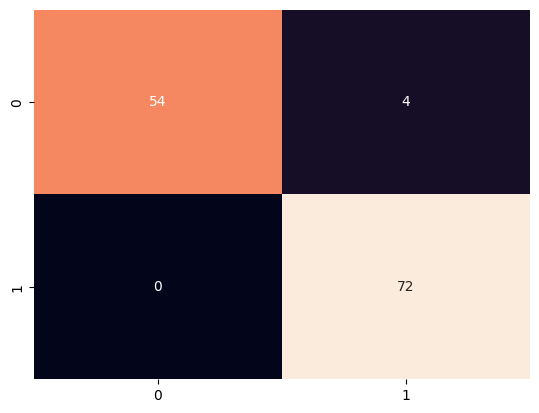

In [57]:
# Creating a confusion matrix

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cbar=False, annot=True)
plt.show()

In [58]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        58
           1       0.95      1.00      0.97        72

    accuracy                           0.97       130
   macro avg       0.97      0.97      0.97       130
weighted avg       0.97      0.97      0.97       130



In [59]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [60]:
feature_importances

,importance
Polyuria,0.214844
Polydipsia,0.193938
Gender,0.119288
partial paresis,0.061056
sudden weight loss,0.050053
Alopecia,0.047943
Irritability,0.047227
Itching,0.043416
Polyphagia,0.037334
visual blurring,0.036605


In [87]:
# Create a new DataFrame for the new data point
data_new = pd.DataFrame({'Gender': [0], 
                         'Polyuria': [1], 
                         'Polydipsia': [0], 
                         'sudden weight loss': [0], 
                         'weakness': [1], 
                         'Polyphagia': [0], 
                         'Genital thrush': [0], 
                         'visual blurring': [0], 
                         'Itching': [0], 
                         'Irritability': [0], 
                         'delayed healing': [0], 
                         'partial paresis': [1], 
                         'muscle stiffness': [0], 
                         'Alopecia': [0], 
                         'Obesity': [0]})

# Update the feature importances with the provided values
feature_importances = [0.214844, 0.193938, 0.119288, 0.061056, 0.050053, 0.047943, 0.047227, 0.043416, 0.037334, 0.036605, 0.036365, 0.031468, 0.031143, 0.028540, 0.020780]

# Calculate the total percentage likelihood of the new data point being diabetic
percent_likelihood = np.multiply(data_new, feature_importances).sum(axis=1) * 100
print(f"The percentage likelihood of the new data point being diabetic is {percent_likelihood[0]:.2f}%")


The percentage likelihood of the new data point being diabetic is 27.55%
